In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import networkx as nx

In [3]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
features = iris.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [8]:
species = iris.loc[:, 'Species']

In [9]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
species.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [11]:
pdist?

Signature: pdist(X, metric='euclidean', *args, **kwargs)
Docstring:
Pairwise distances between observations in n-dimensional space.

See Notes for common calling conventions.

Parameters
----------
X : ndarray
    An m by n array of m original observations in an
    n-dimensional space.
metric : str or function, optional
    The distance metric to use. The distance function can
    be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
    'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
*args : tuple. Deprecated.
    Additional arguments should be passed as keyword arguments
**kwargs : dict, optional
    Extra arguments to `metric`: refer to each metric documentation for a
    list of all possible arguments.

    Some possible arguments:

    p : scalar
    The p-norm to apply for Minkowski, weighted an

In [13]:
distances = pdist(features.values, metric='euclidean')

In [14]:
distances

array([0.53851648, 0.50990195, 0.64807407, ..., 0.6164414 , 0.64031242,
       0.76811457])

In [15]:
kernel_width = distances.mean()
weights = np.exp(-distances**2 / kernel_width**2)

In [16]:
adjacency = squareform(weights)

In [17]:
adjacency

array([[0.        , 0.95617246, 0.9606158 , ..., 0.04624386, 0.0353404 ,
        0.07073335],
       [0.95617246, 0.        , 0.98618756, ..., 0.043809  , 0.03206181,
        0.06954108],
       [0.9606158 , 0.98618756, 0.        , ..., 0.03479844, 0.02642972,
        0.0575027 ],
       ...,
       [0.04624386, 0.043809  , 0.03479844, ..., 0.        , 0.94296539,
        0.9386037 ],
       [0.0353404 , 0.03206181, 0.02642972, ..., 0.94296539, 0.        ,
        0.91285396],
       [0.07073335, 0.06954108, 0.0575027 , ..., 0.9386037 , 0.91285396,
        0.        ]])

In [18]:
features['SepalLengthSquared'] = features['SepaLengthCm']**2
features.head()

KeyError: 'SepaLengthCm'

In [19]:
features['SepalLengthSquared'] = features['SepalLengthCm']**2
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalLengthSquared
0,5.1,3.5,1.4,0.2,26.01
1,4.9,3.0,1.4,0.2,24.01
2,4.7,3.2,1.3,0.2,22.09
3,4.6,3.1,1.5,0.2,21.16
4,5.0,3.6,1.4,0.2,25.00


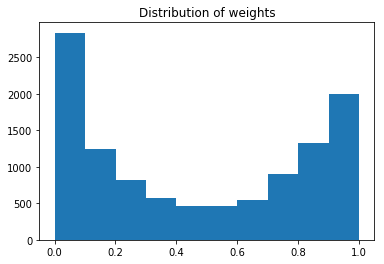

In [20]:
plt.hist(weights)
plt.title('Distribution of weights')
plt.show()

In [21]:
adjacency[adjacency < 0.6] = 0

In [22]:
graph = nx.from_numpy_array(adjacency)

/Users/aminmekacher/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


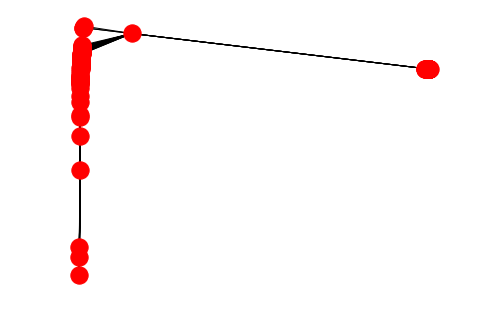

In [23]:
nx.draw_spectral(graph)

/Users/aminmekacher/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


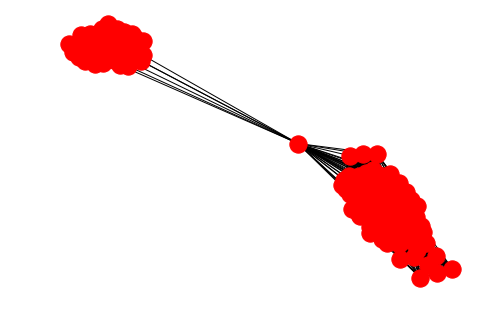

In [25]:
nx.draw_spring(graph)

In [27]:
nx.write_gexf(graph, 'iris.gexf')